<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [57]:
import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [58]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [59]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [60]:
df.tail()


,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [61]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [63]:
df.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [64]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [65]:
pandas_profiling.ProfileReport(df)

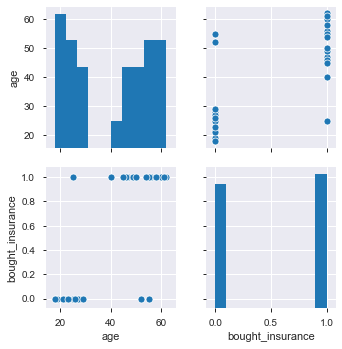

In [66]:
sns.pairplot(df)

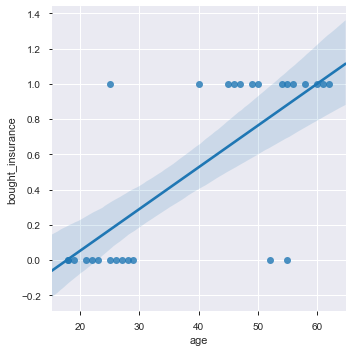

In [67]:
sns.lmplot('age','bought_insurance',data=df)

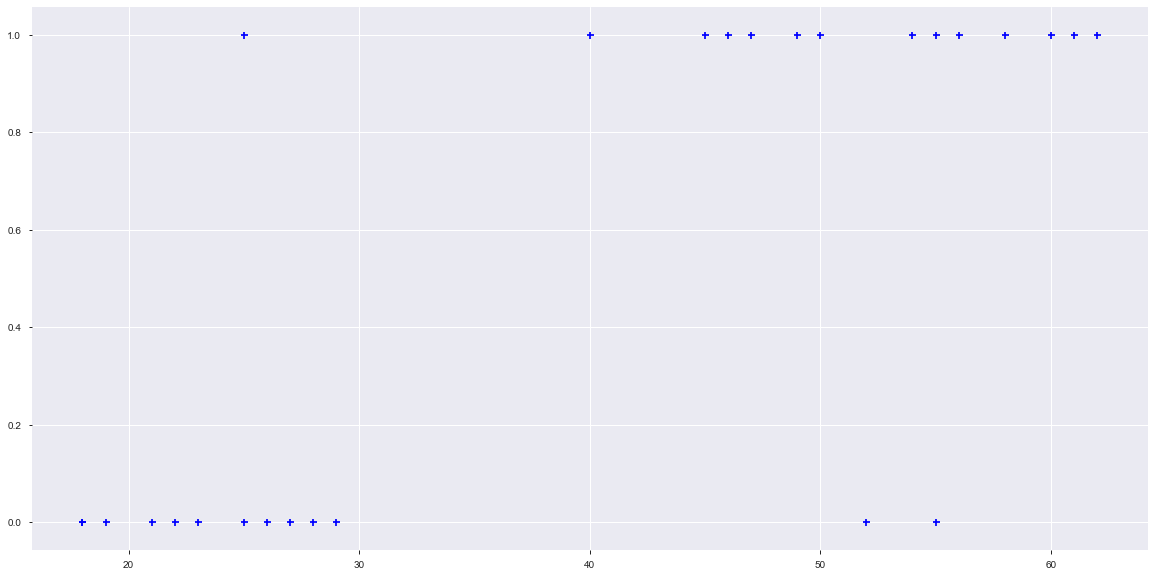

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(df.age,df.bought_insurance,marker='+',color='blue')

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [71]:
X_test.shape

(3, 1)

In [72]:
y_train.shape

(24,)

In [73]:
X_train.shape

(24, 1)

In [74]:
y_test.shape

(3,)

### Slover:
* LBFGS [Limited Memory-BFGS]  (Optimization Algorthm if target problem is to minimization $f(x)$ over a unconstrained values of the real vector `x`)

where `f` is a diffrentiable scalar funaction


In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')

In [76]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
X_test

,age
16,25
11,28
4,46


In [78]:
model.coef_

array([[0.16590778]])

In [79]:
model.intercept_

array([-6.96244238])

In [80]:
X_test

,age
16,25
11,28
4,46


In [81]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1], dtype=int64)

In [82]:
y_test

16    1
11    0
4     1
Name: bought_insurance, dtype: int64

In [83]:
model.predict_proba(X_test)

array([[0.94346758, 0.05653242],
       [0.91027722, 0.08972278],
       [0.3386501 , 0.6613499 ]])

In [84]:
model.score(X_test,y_test)

0.6666666666666666

In [85]:
model.predict([[58]])

array([1], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,y_predicted)

0.6666666666666666

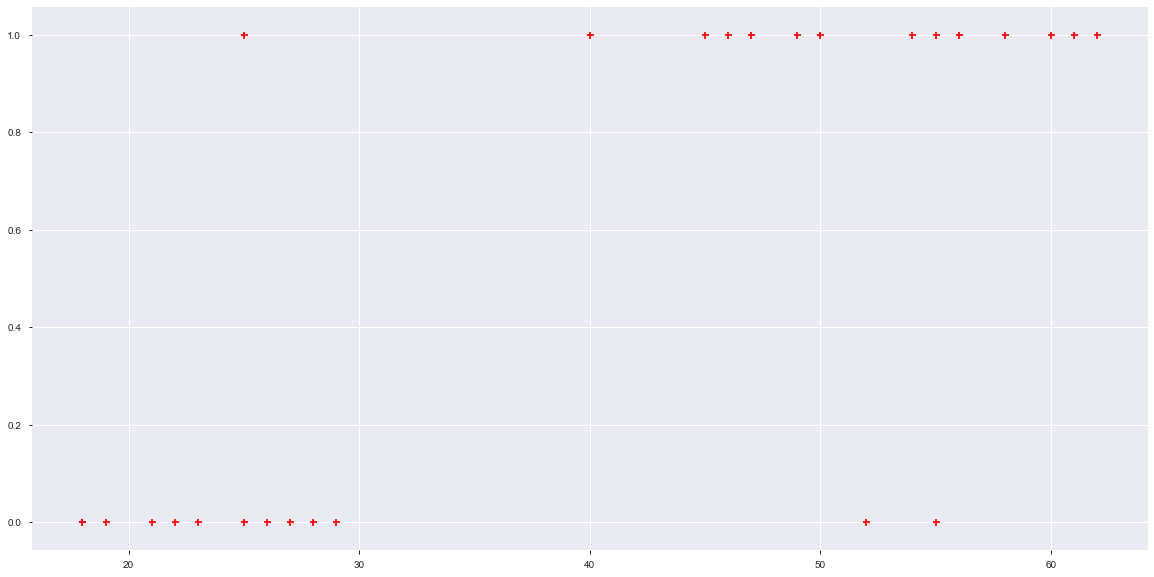

In [88]:
plt.figure(figsize=(20,10))
import numpy as np
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
#plt.plot(df.age,1 + np.exp(model.intercept_+(df.age*model.coef_)))

In [89]:
Slov = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in Slov:
    clf = LogisticRegression(solver=i)
    clf.fit(X_train,y_train)
    New_Predict = clf.predict(X_test)
    print(New_Predict)

[0 0 1]
[0 0 1]
[0 0 1]
[1 1 1]
[1 1 1]


c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Classification Metrics

In [90]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [91]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [92]:
confusion_matrix(y_predicted,y_test)

array([[1, 1],
       [0, 1]], dtype=int64)

In [93]:
accuracy_score(y_predicted,y_test)

0.6666666666666666

In [94]:
from sklearn.metrics import log_loss

In [95]:
log_loss(y_predicted,y_test)

11.51319199744696

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model